In [11]:
import numpy as np

In [12]:
# task 1

# input data
x = np.array([0.,1.,2.,3.,4.,4.,6.,7.,8.,9.])
y = np.array([3.6,1.3,0.2,0.9,5.,8.,9.,12.,12.,13.])
d = 2 # polynomial order

In [13]:
# define the polynomial functions
cp = np.polyfit(x,y,d)
F = np.poly1d(cp)

In [14]:
# calculate R^2
numer = np.sum((y - F(x))**2)
denom = np.sum((y - np.mean(y))**2)
R2 = 1 - (numer/denom)
R2

0.8370419959018589

In [15]:
# calculate r^2 adjusted
n = len(x)
R2_adj = 1 - ((numer/denom)*((n-1)/(n-d-1)))
R2_adj

0.7904825661595328

In [16]:
# define the above as a function
def calcreg(x,y,d):
    import numpy as np
    
    n = len(x)
    
    cp = np.polyfit(x,y,d)
    F = np.poly1d(cp)
    
    numer = np.sum((y - F(x))**2)
    denom = np.sum((y - np.mean(y))**2)

    R2 = 1 - (numer/denom)
    R2_adj = 1 - ((numer/denom)*((n-1)/(n-d-1)))
    
    return(R2,R2_adj)

In [17]:
# calculate the regression lines for orders 1 to 5
for i in (1,2,3,4,5):
    print(calcreg(x,y,i))

(0.8129942630185348, 0.7896185458958518)
(0.8370419959018589, 0.7904825661595328)
(0.9245469925455363, 0.8868204888183044)
(0.9437849894794875, 0.8988129810630776)
(0.9445633838434522, 0.8752676136477675)


In [18]:
import matplotlib.pyplot as plt

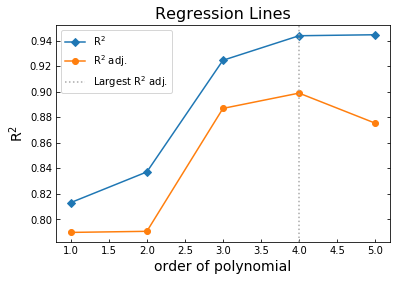

In [19]:
# task 2

# plot the regression values for each order, where the "best" data
# is that with the highest value of R^2 adjusted.

order = (1,2,3,4,5)
R2 = []
R2_adj = []
for i in order:
    R2.append(calcreg(x,y,i)[0])
    R2_adj.append(calcreg(x,y,i)[1])
    
plt.plot(order,
         R2,
         '-D',
         label='R$^2$',)

plt.plot(order,
         R2_adj,
         '-o',
         label='R$^2$ adj.')

#plt.axhline(np.max(R2_adj),color='darkgrey',linestyle=':')
plt.axvline(order[np.min(np.where(R2_adj==np.max(R2_adj)))],
            color='darkgrey',
            linestyle=':',
            label='Largest R$^2$ adj.')

plt.tick_params(direction='in',right=True)
plt.xlabel('order of polynomial',fontsize=14)
plt.ylabel('R$^{2}$',fontsize=14)
plt.title('Regression Lines',fontsize=16)
plt.legend()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

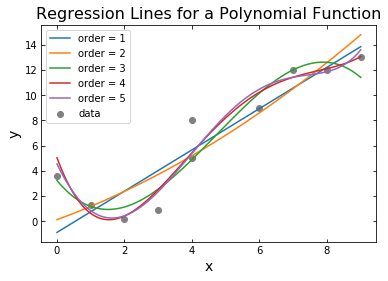

In [20]:
# Task 3.

# Plot data.
plt.scatter(x,y,
            color='grey',
            label='data')

# Create dataset.
X = sum([list(np.linspace(x[i],x[i+1],18)) for i in range(len(x)-1)],[])
Y = sum([list(np.linspace(y[i],y[i+1],18)) for i in range(len(y)-1)],[])

# Apply polynomial functions and plot.
for item in order:
    p = np.poly1d(np.polyfit(X,Y,item))
    poly = [p(i) for i in X]
    plt.plot(X,poly,
             label=f'order = {item}')

# Set plot parameters.
plt.tick_params(direction='in',
                right=True,top=True)
plt.xlabel('x',
           fontsize=14)
plt.ylabel('y',
           fontsize=14)
plt.title('Regression Lines for a Polynomial Function',
          fontsize=16)
plt.legend()

plt.show